In [1]:
from trackers import QuizTracker,TopicTracker,MassTracker

In [2]:
def json_loader(file:str):
    import json
    if file.startswith('https://'):
        from requests import get
        resp = get(file)
        temp = json.loads(resp.content)
        return temp
    
    elif file.lower().endswith('.json'):
        with open(file) as f:
            temp = json.load(f)
        return temp
    
    print('only url starting with https:// or files ending with .json is supported')
    return {}

In [3]:
Q_EP_LINK = 'https://www.jsonkeeper.com/b/LLQT'
Q_SD_LINK = 'https://api.jsonserve.com/rJvd7g'
A_EP_LINK = 'https://api.jsonserve.com/XgAgFJ'

In [4]:
a_ep = json_loader('jsons/api_endpoint.json')
q_ep = json_loader('jsons/quiz_endpoint.json')
q_sd = json_loader('jsons/quiz_submission_data.json')

# QuizTracker Test

In [5]:
quiz_taken:dict[int,QuizTracker] = {}
for quiz in reversed(a_ep):
    if quiz['quiz_id'] not in quiz_taken:
        quiz_taken[quiz['quiz_id']] = QuizTracker(quiz)
    else:
        quiz_taken[quiz['quiz_id']].retook(quiz)
        

In [6]:
q_tracker = quiz_taken[51]
avg_stat = q_tracker.average_stats()
last = q_tracker.latest()

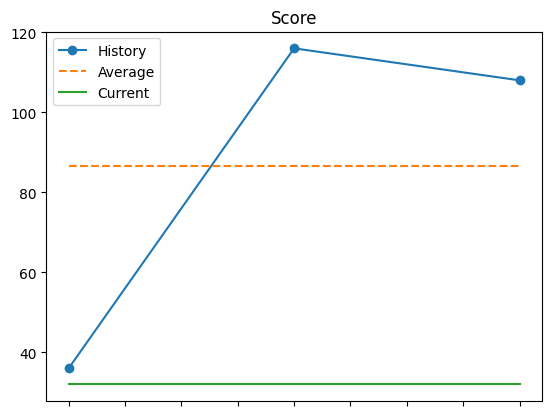

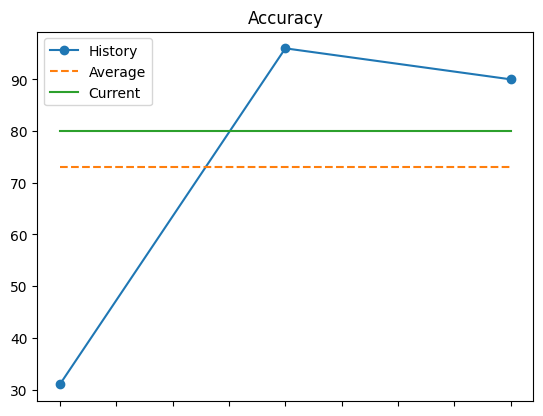

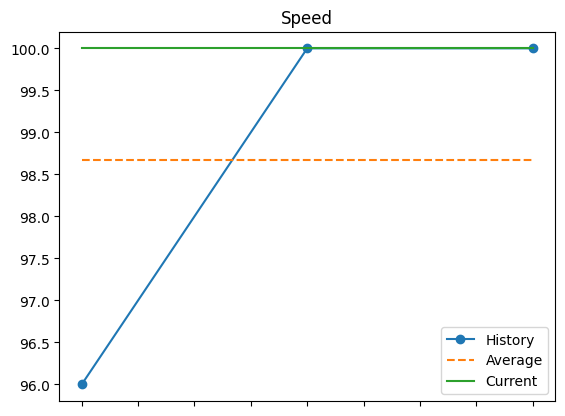

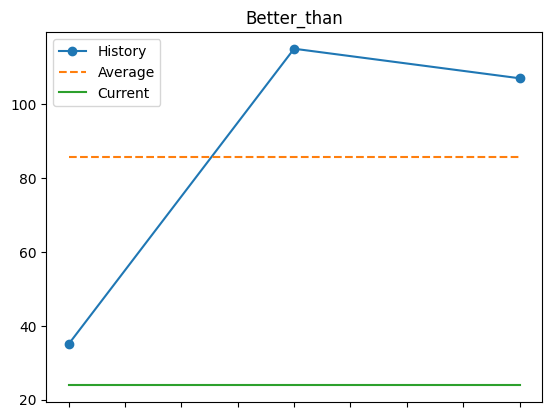

In [7]:
q_tracker.compare_from_past(q_sd)

# TopicTracker Test

In [8]:
topic_taken:dict[int,TopicTracker] = {}
for quiz in reversed(a_ep):
    if (name:=quiz['quiz']['topic'].lower().strip()) not in topic_taken:
        topic_taken[name] = TopicTracker(quiz)
    else:
        topic_taken[name].retook(quiz)
        

In [9]:
top = topic_taken['body fluids and circulation']

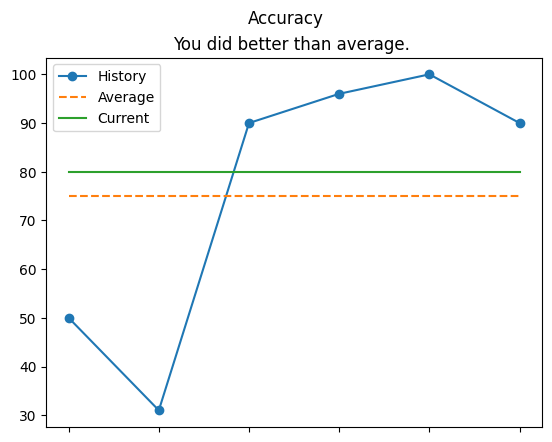

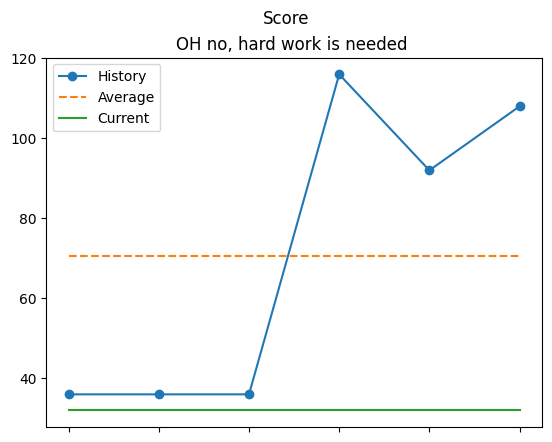

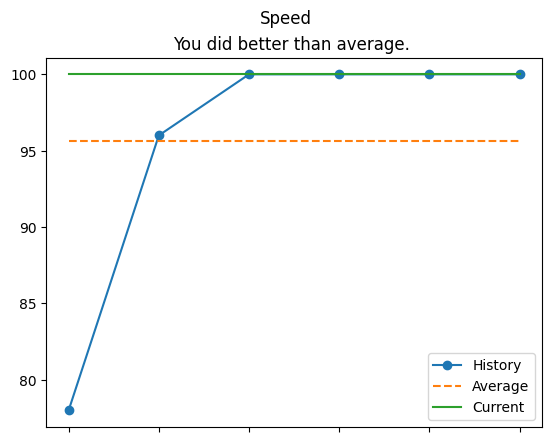

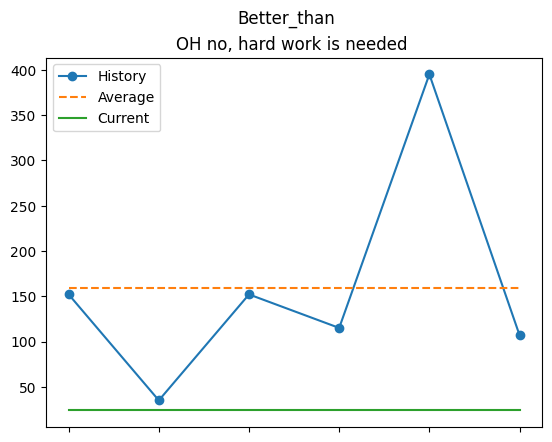

In [10]:
top.compare_from_past(q_sd)

# MassTracker Test

In [11]:
trackers = MassTracker(a_ep)

In [12]:
swot = trackers.SWOTAnalysis()

In [13]:
swot['suggestions']

['You need to study `respiration and gas exchange` more',
 'You need to study `reproductive health` more',
 'You need to study `human health and disease` more',
 'You seem a bit confused in the topic `microbes in human welfare`.',
 'You need to study `principles of inheritance and variation` more',
 'You need to study `body fluids and circulation` more',
 'You need to study `human reproduction` more']

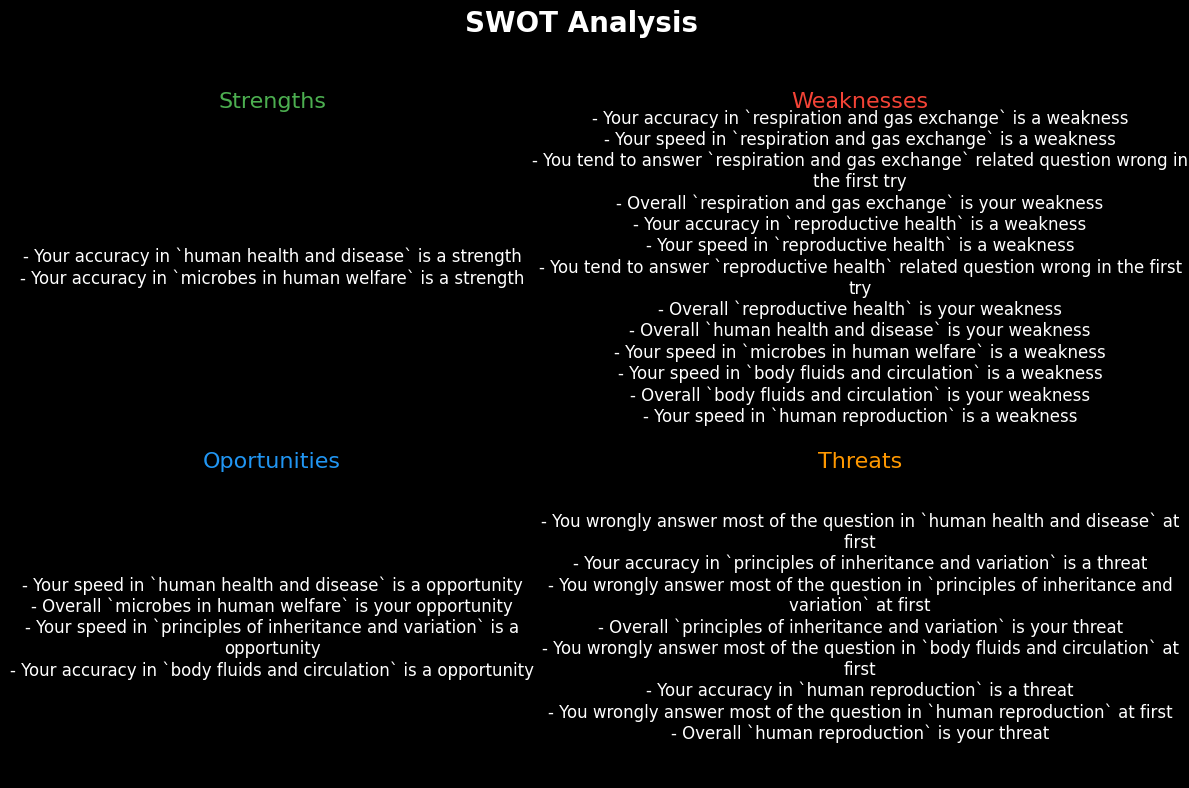

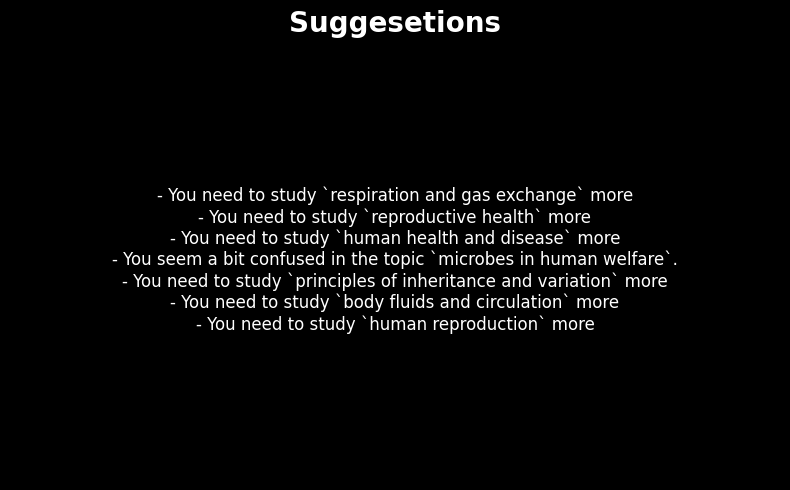

In [14]:
trackers.SWOTImage('swot.png')

In [15]:
trackers.compare_from_past(q_sd)

This is the first quiz under the topic  structural organisation in animals . Hence can not compare


In [16]:
trackers.add_quiz(q_sd)

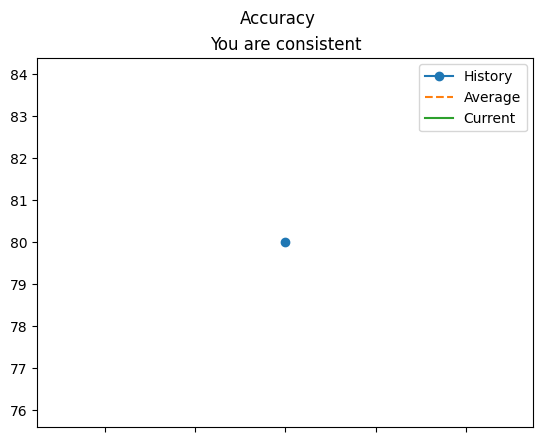

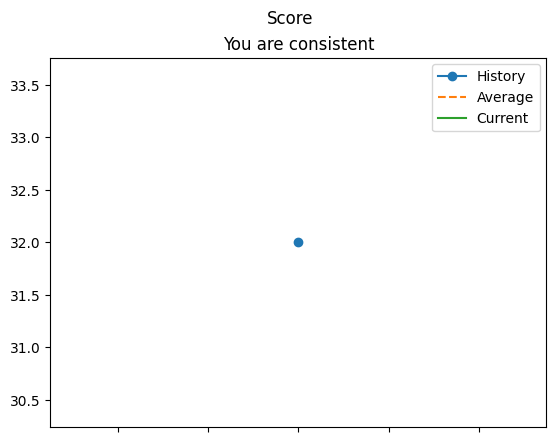

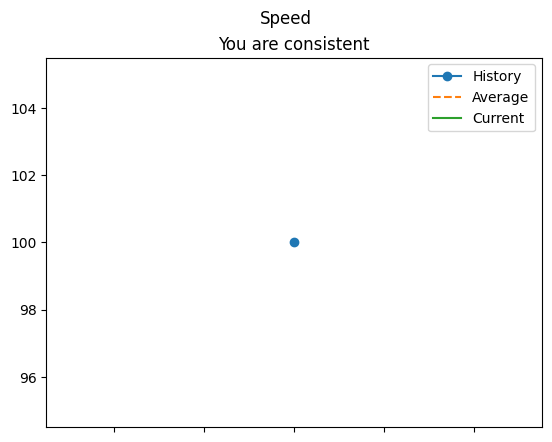

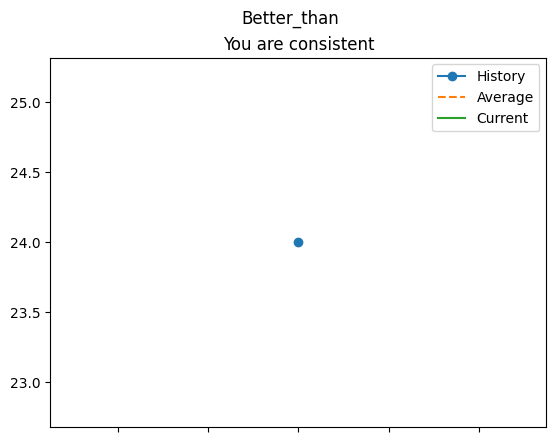

In [17]:
trackers.compare_from_past(q_sd)

In [18]:
verify = json_loader('jsons/dummy_check.json')

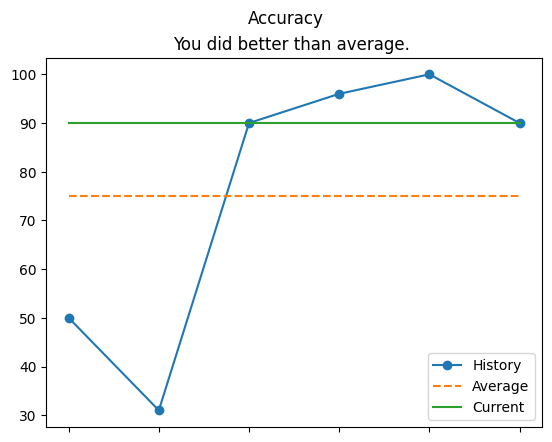

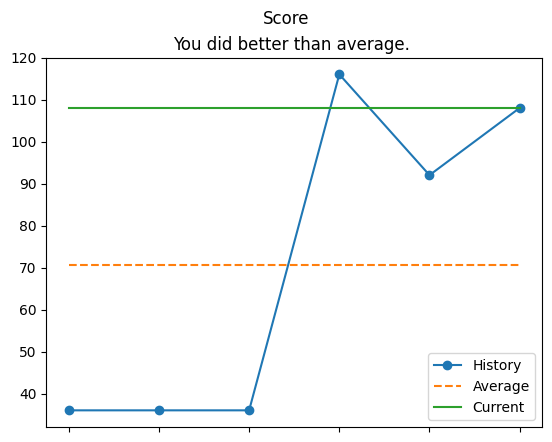

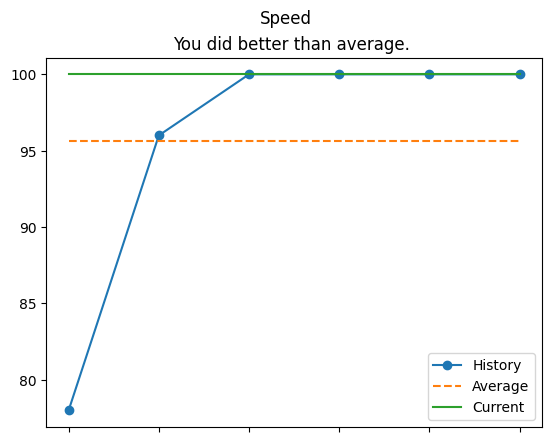

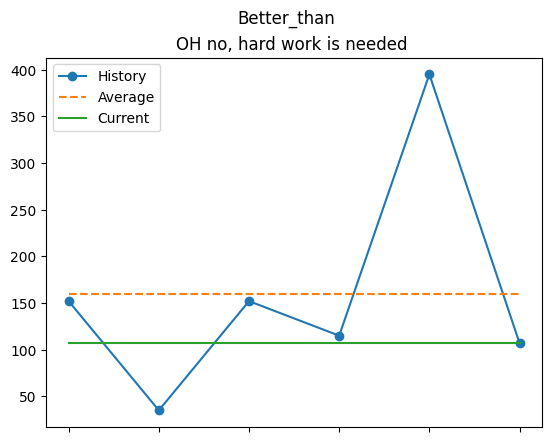

In [19]:
trackers.compare_from_past(verify)